<h1>TP Integrador - CaC Big Data</h1>
<center><img src ="/work/img/portada.png"</center>

<h3>Gabriela Cristina Rodriguez<br>DNI:17107787<br>Comision #22041<br> Codo a Codo 4.0-BIG DATA-AÑO 2022<h3>

<h1 TP Integrador - CaC Big Data /h1>


<h4>Analisis de datos para empresa ficticia Global_Insumos<h4>



<h1 style='color:#0B4C5F'align="center">Global_Insumos</h1>
<center style="opacity:0.8"><img src ='/work/imagen para deep note.jpg'></center>
<h3 style='color:#0C3C4E'align="center">Ventas de insumos para computacion<h3>


In [ ]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import openpyxl # para que levante bien el excel
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# Levanto los datos en 3 diferentes dataframes
conn = sql3.connect('/work/data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns = ['article_id', 'article_name', 'unit_price'])

# Vendedores
df_sellers = pd.read_excel('/work/data/sellers.xlsx')

# Órdenes
df_orders = pd.read_csv('/work/data/orders.csv')


<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [ ]:
# Exploración del df de artículos
print('Muestra de datos')
print(df_articles.head())
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBúsqueda de valores nulos por columna')
print(df_articles.isnull().sum())
print('\nFormato de los datos por columna')
print(df_articles.dtypes)


Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Búsqueda de valores nulos por columna
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos por columna
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploración del df de vendedores
print('Muestra de datos')
print(df_sellers.head())
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores nulos por columna')
print(df_sellers.isnull().sum())
print('\nFormato de los datos por columna')
print(df_sellers.dtypes)

Muestra de datos
   seller_id        seller_name
0          1   Aveline Swanwick
1          2           Jase Doy
2          3  Oliviero Charkham
3          4   Cornie Wynrehame
4          5        Ewell Peres

Formato del dataframe
(15, 2)

Búsqueda de valores nulos por columna
seller_id      0
seller_name    0
dtype: int64

Formato de los datos por columna
seller_id       int64
seller_name    object
dtype: object


In [ ]:
# Exploración del df de órdenes
print('Muestra de datos')
print(df_orders.head())
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBúsqueda de valores nulos por columna')
print(df_orders.isnull().sum())
print('\nFormato de los datos por columna')
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Búsqueda de valores nulos por columna
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos por columna
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [ ]:

df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)


article_id        int64
article_name     object
unit_price      float64
dtype: object


<p>Configuro Pandas para que realice el cambio de formato de moneda a $:</p>

In [ ]:
pd.options.display.float_format ="$ {:,.2f}".format

<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='/work/img/modelo.png'>


<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

<h5>Utilizo el metodo merge,de forma anidada, para obtener my_df y una operacion para obtener el monto total que sera introducido en una lista de columnas, con el df anterior como argumento y las columnas que necesitamos .</h5>

In [ ]:
df_merge = (df_sellers.merge(df_orders, on='seller_id', how='inner').merge(df_articles,on="article_id"))

df_merge['total_amount']=df_merge['quantity']*df_merge['unit_price']

my_df=pd.DataFrame(df_merge, columns = ['week','quantity','article_name','total_amount', 'seller_name', 'country_name'])

print(my_df)
my_df


     week  quantity article_name  total_amount       seller_name country_name
0       1         9         Desk    $ 1,170.90  Aveline Swanwick       Mexico
1       2         8         Desk    $ 1,040.80  Aveline Swanwick       Brazil
2       2        11         Desk    $ 1,431.10  Aveline Swanwick       Brazil
3       3         7         Desk      $ 910.70  Aveline Swanwick       Brazil
4       2         1         Desk      $ 130.10          Jase Doy      Bolivia
..    ...       ...          ...           ...               ...          ...
995     3         4          CPU      $ 558.48   Arnold Kilkenny    Guatemala
996     2         5          CPU      $ 698.10    Janel O'Curran       Brazil
997     2         7          CPU      $ 977.34    Janel O'Curran      Uruguay
998     3        15          CPU    $ 2,094.30    Janel O'Curran    Argentina
999     1        15          CPU    $ 2,094.30   Daisie Slograve       Brazil

[1000 rows x 6 columns]


,week,quantity,article_name,total_amount,seller_name,country_name
0,1,9,Desk,"$ 1,170.90",Aveline Swanwick,Mexico
1,2,8,Desk,"$ 1,040.80",Aveline Swanwick,Brazil
2,2,11,Desk,"$ 1,431.10",Aveline Swanwick,Brazil
3,3,7,Desk,$ 910.70,Aveline Swanwick,Brazil
4,2,1,Desk,$ 130.10,Jase Doy,Bolivia
...,...,...,...,...,...,...
995,3,4,CPU,$ 558.48,Arnold Kilkenny,Guatemala
996,2,5,CPU,$ 698.10,Janel O'Curran,Brazil
997,2,7,CPU,$ 977.34,Janel O'Curran,Uruguay
998,3,15,CPU,"$ 2,094.30",Janel O'Curran,Argentina


<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA:agrupo los datos por articulo y sumo las cantidades vendidas.
df_cant_articulos = my_df.groupby('article_name').sum()

#Se ordena en forma descendente para visualizar los 10 mas vendidos
df_cant_articulos_ord = df_cant_articulos.sort_values('quantity', ascending=False).head(10)

#Imprimo con campo cantidad para que me muestre solo esa columna y los articulos
df_cant_articulos_ord[['quantity']].style.set_properties(**{'border': '1.5px solid cyan','color': 'crimson'})


,quantity
article_name,
HDD,413
Tablet,374
SDD,372
Mouse,322
Netbook,320
Ram Memory,293
Motherboard,291
Pci Express Port,291
Smartphone,290


<h4>El articulo que obtuvo la mayor cantidad de ventas es el HDD. Se realiza una visualizacion descendente de los primero 10 mas vendidos.
</h4>

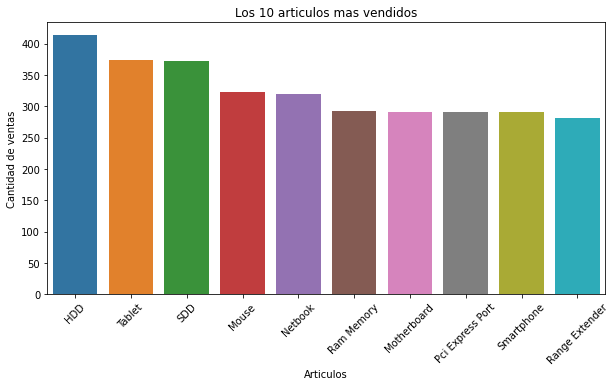

In [ ]:
# RESOLUCIÓN GRÁFICA


sns.barplot(y = df_cant_articulos_ord["quantity"], x=df_cant_articulos_ord.index)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.grid(False)
plt.title("Los 10 articulos mas vendidos")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Articulos")
plt.show()



<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA

df_monto_articulo_ord = my_df.groupby('article_name').sum().sort_values('total_amount', ascending=False).head(5)


df_monto_articulo_ord[['total_amount']].style.set_properties(**{'border': '1.5px solid crimson','color': 'cyan'}).format("$ {:.2f}")


,total_amount
article_name,
Full Pc,$ 538335.93
Notebook,$ 251000.00
Smartphone,$ 152250.00
Chair,$ 69477.48
Tablet,$ 48620.00


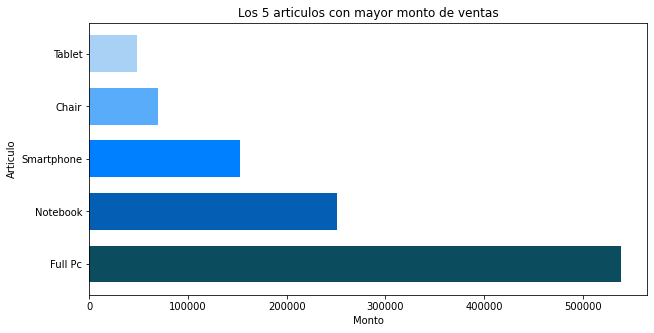

In [ ]:
# RESOLUCIÓN GRÁFICA 
plt.barh(df_monto_articulo_ord.index, df_monto_articulo_ord['total_amount'] , height=0.7,color=["#0B4C5F","#045FB4","#0080FF","#58ACFA","#A9D0F5"])
plt.gcf().set_size_inches(10, 5)
plt.grid(False)
plt.title("Los 5 articulos con mayor monto de ventas")
plt.ylabel("Articulo")
plt.xlabel("Monto")
plt.show()


<h4>El articulo Full PC obtuvo el mayor monto de ventas. Se realiza una visualizacion ascendente de los primeros 5 mas vendidos.
</h4>

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
df_monto_vendedor_ord = my_df.groupby('seller_name').sum().sort_values('total_amount', ascending=False).head(10)

df_monto_vendedor_ord[['total_amount']].style.highlight_max().format("$ {:.2f}")


,total_amount
seller_name,
Janel O'Curran,$ 192832.47
Brockie Patience,$ 142709.88
Oliviero Charkham,$ 141329.76
Vasily Danilyuk,$ 129157.55
Daisie Slograve,$ 120520.11
Aveline Swanwick,$ 118874.33
Arnold Kilkenny,$ 94552.04
Kati Innot,$ 83704.62
Jase Doy,$ 80628.31


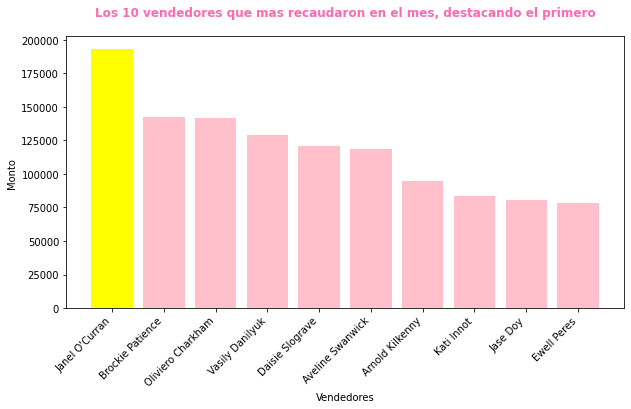

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(df_monto_vendedor_ord.index, df_monto_vendedor_ord['total_amount'],color=["yellow","pink","pink","pink","pink","pink","pink","pink","pink","pink"])
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=45,ha="right")
plt.grid(False)
plt.title("Los 10 vendedores que mas recaudaron en el mes, destacando el primero",color="hotpink",fontweight="bold",pad="20.0")
plt.ylabel("Monto")
plt.xlabel("Vendedores")
plt.show()



<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [ ]:
# RESOLUCIÓN ANALÍTICA
df_monto_vtas_mes = my_df.groupby('week').sum().sort_values('total_amount', ascending=False)


df_monto_vtas_mes[['total_amount']].style.background_gradient().format("$ {:.2f}")


,total_amount
week,
1,$ 507458.81
2,$ 415364.44
3,$ 329140.03
4,$ 223844.56


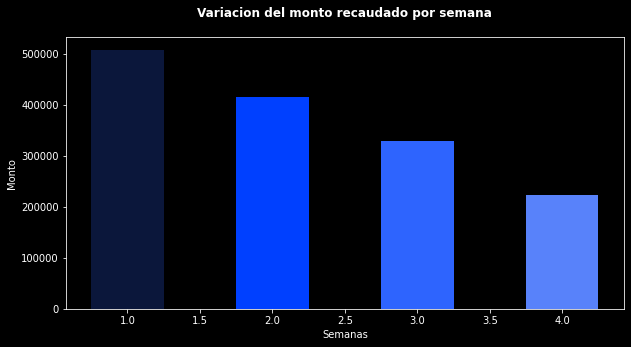

In [ ]:
# RESOLUCIÓN GRÁFICA

plt.style.use('dark_background')
g=plt.bar(df_monto_vtas_mes.index,df_monto_vtas_mes['total_amount'], width=0.5,color=['#0B173B','#0040FF','#2E64FE','#5882FA'] )
plt.gcf().set_size_inches(10, 5)
plt.grid(False)
plt.title("Variacion del monto recaudado por semana",color="white",fontweight="bold",pad="20.0")
plt.ylabel("Monto")
plt.xlabel("Semanas")
plt.show()



<h4>Se observa una variacion en el monto total recaudado en forma descendente, hacia la cuarta semana de mes. Se recomienda realizar campaña de promociones en el periodo donde se encuentra mas baja la recaudacion. De esa forma, en el mes entrante se podran percibir pagos realizados con tarjeta a consecuencia de las promociones otorgadas a fin de mes.
</h4>

<h3>Monto total obtenido por cada pais</h3>

In [ ]:
# RESOLUCIÓN
df_monto_vtas_pais = my_df.groupby('country_name').sum().sort_values('total_amount', ascending=False)


df_monto_vtas_pais[['total_amount']].style.set_properties(**{'border': '1.5px solid orange','color': 'green'}).format("$ {:.2f}")

,total_amount
country_name,
Brazil,$ 441271.85
Argentina,$ 205832.78
Colombia,$ 177514.29
Peru,$ 161421.12
Mexico,$ 138619.99
Venezuela,$ 77684.52
El Salvador,$ 57391.26
Guatemala,$ 52579.25
Honduras,$ 36763.56


<h4>Se observa a Brasil como el pais del que mayor recaudacion se obtuvo
</h4>

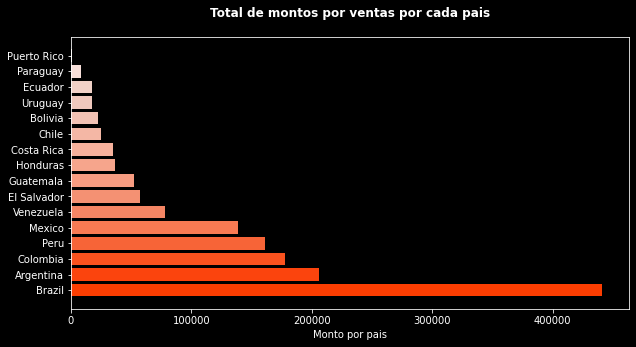

In [ ]:

plt.barh(df_monto_vtas_pais.index, df_monto_vtas_pais['total_amount'],color=["#FB3D01","#FB440D","#FA521E","#F76437","#F87A53","#F48564","#F49173","#F79C81","#F6A58C","#F6B19C","#F4B7A5","#F2C2B4","#EFC8BD","#F1D1C7","#F7DFD9","#F7EDE9"])
plt.gcf().set_size_inches(10, 5)
plt.title("Total de montos por ventas por cada pais",color="white",fontweight="bold",pad="20.0")
plt.grid(False)
plt.xlabel("Monto por pais")
plt.show()


<h3>Mayores monto de venta obtenidos por pais, por cada vendedor</h3>

In [ ]:
# RESOLUCIÓN: Se agrupa por las dos claves, pais y vendedor y se suma el monto recaudado por vendedor y por pais.

df_monto_vendedorpais = my_df.groupby(['country_name','seller_name']).sum()


#Vuelvo a agrupar esta vez por pais y se le indica que es indice.
#despues compruebo que es un objeto index que tiene una lista, con el punto values,devuelve el objeto como un array.

paises = df_monto_vendedorpais.groupby('country_name').sum().index.values

#Creo un dataframe vacio donde se va a volcar la informacion luego de loopear la lista
#paises donde se va a obtener el maximo por pais. El valor de el df paises es el index.

df_paises=pd.DataFrame(columns=['Vendedores','Monto'], index=paises)



for pais in paises:
    df = df_monto_vendedorpais.loc[pais]                #asigno cada pais a un df
    mt = df.max()['total_amount']                       #cuando lo encuentra, se usa para buscar en el mismo df cual es el indice
    v = df[(df['total_amount'] == mt)].index[0]         #devuelve un objeto del cual nos traemos el primer elemento
    df_paises.loc[pais]= {'Vendedores': v, 'Monto': mt }#asigno un diccionario al dataframe vacio, por cada fila para cada pais indicando vendedores y monto.


df_paises=df_paises.sort_values('Monto', ascending=False)#para mejor visualizacion y tambien para ver la mayor recaudacion de todas se ordena.


df_paises[["Vendedores"]+["Monto"]].style.set_properties(**{'border': '2px solid green','color': 'red'})




,Vendedores,Monto
Brazil,Daisie Slograve,65283.280000
Peru,Brockie Patience,46089.880000
Argentina,Janel O'Curran,34971.470000
Venezuela,Oliviero Charkham,33961.530000
Colombia,Brockie Patience,33654.380000
El Salvador,Janel O'Curran,32967.150000
Mexico,Jase Doy,29096.300000
Guatemala,Vasily Danilyuk,27661.530000
Costa Rica,Oliviero Charkham,24021.210000
Honduras,Oliviero Charkham,19403.320000


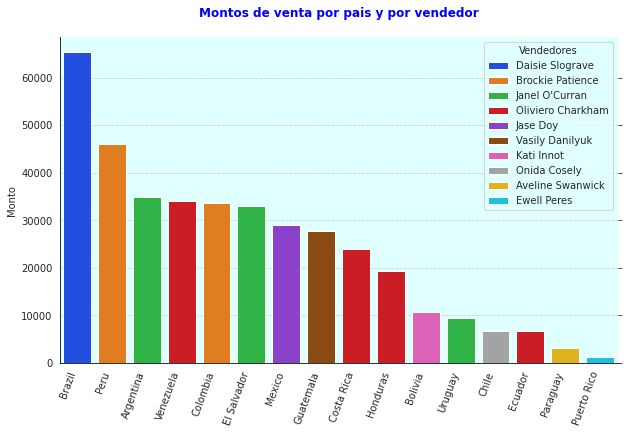

In [ ]:
myStyle = {
    'axes.edgecolor': 'black',
    'axes.facecolor': 'LightCyan',
    'axes.grid': True,
    'grid.linestyle': '--',
    'ytick.right': True,
    'axes.spines.right': False,
    'axes.spines.top': False
}
sns.set_style("white")
sns.set_style(myStyle)
plt.figure(figsize=(10,6))
g=sns.barplot(data=df_paises, x=df_paises.index ,y='Monto', hue='Vendedores',palette="bright",dodge=False)
g.set_xticklabels(labels=df_paises.index,rotation=70,ha="right")
g.set_title("Montos de venta por pais y por vendedor",color="blue",fontweight="bold",pad="20.0")
plt.show()







<h3>Menor cantidad de ordenes de venta por articulos y por semana  </h3>

In [ ]:
# RESOLUCIÓN: Se realiza un procedimiento similar al efectuado agrupando pais vendedor, por monto 
# Aqui agrupo por articulo y semana, para conocer cantidad
df_cant_artimes = my_df.groupby(['article_name','week']).sum()

articulos = df_cant_artimes.groupby("article_name").sum().index.values

df_nuevo=pd.DataFrame(columns=['Semana', 'Ventas'], index=articulos)
#Este loop es similar al anterior solo que busco las semanas donde se realizaron menor cantidad de ventas
for a in articulos:
    df1 = df_cant_artimes.loc[a]
    tot = df1.min()['quantity']
    w = df1[(df1['quantity'] == tot)].index[0]
    df_nuevo.loc[a]= {'Semana': w, 'Ventas': tot }
    
df_nuevo['Semana'] = df_nuevo['Semana'].astype(int)#se realiza casteo porque semana no se trataba de un entero sino de un objeto
df_nuevo['Ventas'] = df_nuevo['Ventas'].astype(int)#se castea ventas porque se trata de cantidades, no montos.
df_nuevo=df_nuevo.sort_values('Ventas', ascending=True)#ordeno para buscar la menor cantidad de ventas por articulo y por semana
df_nuevo[["Semana"]+["Ventas"]].style.background_gradient()




,Semana,Ventas
Scanner,4,1
Desk,4,6
Wi-Fi Card,4,10
Case,4,13
Keyboard,4,14
Mouse,4,15
Mesh Wi-Fi X 2,4,18
Headphones,4,22
HDD,4,23
Monitor,4,23


<h4>Visualizacion de la caida de venta por articulo segun semana:  </h4>

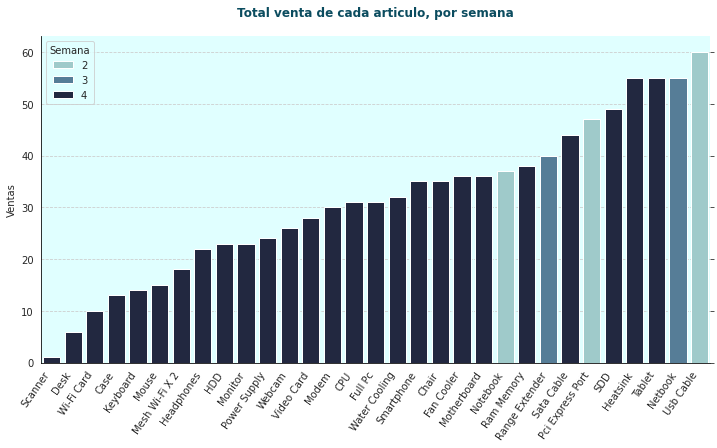

In [ ]:
g=sns.barplot(data=df_nuevo, x=df_nuevo.index ,y='Ventas', hue='Semana',palette="ch:rot=-.25,hue=1,light=.75",dodge=False)
plt.gcf().set_size_inches(12, 6)
g.set_xticklabels(labels=df_nuevo.index,rotation=55,ha="right")
g.set_title("Total venta de cada articulo, por semana",color="#0B4C5F",fontweight="bold",pad="20.0")
plt.show()



<h2>Conclusiones y propuestas</h2>

<h3 style='color:#0B3B0B'>Conclusiones:</h3>
Despues de analizar el set de datos de venta y con ayuda de la grafica realizada,
estamos en condiciones de concluir:

1-Entre los 10 articulos mas vendidos se destaca en primer lugar los HDD. Tambien estan entre las primeras posiciones las memorias SSD casi junto con las Tablet. Esto parece indicar la tendencia a seguir utilizando discos duros, y ante las numerosas ventajas de las SSD puede influir que los HDD siguen siendo mas economicos y con una buena capacidad de almacenamiento.

2-En cuanto a monto total, el articulo que mas ingresos proporciono es la Full PC,seguida de Notebooks y Smarts, debido a sus precios unitarios mas elevados.

3-El mejor vendedor del mes, Janel O'Curran con una recaudacion de $192832.47, pero seguido de cerca por dos vendedores que obtuvieron muy buena recaudacion tambien y con poca diferencia entre si:Brockie Patience y Oliviero Charkham.

4-Las variaciones de ventas del mes han sido dadas por cada semana: si bien entre las dos primeras no hay una variacion significativa,se observa una tendencia a bajar que se concreta visiblemente en la cuarta semana, o ultima del mes, posiblemente debido a un tema salarial ya que casi nadie cuenta con dinero para compras en esa etapa,haciendo alusion a posibles clientes asalariados.

5-En el ambito internacional la mayor recaudacion total por ventas corresponde a Brasil, seguido por nuestro pais.

6-Si tomamos el dato de monto por pais, pero por cada vendedor, observamos una coincidencia en cuanto al pais con mayor monto recaudado: Brasil, con el desempeño de la vendedora: Daisie Slograve. Por otra parte,Janel O Curran que antes tuvo el primer lugar, ahora se encuentra en tercer lugar si consideramos que obtuvo la mayor recaudacion para Argentina.

7-Considerando la caida abrupta de ventas de la 4ta semana, se considero analizar algunos de los motivos, visualizando las menores cantidades vendidas por semana para cada articulo. Se concluyo en el informe que en la 4ta semana no solo se recaudo poco en monto, sino que tambien las ventas disminuyeron en casi todos los articulos, considerando el que menos se vendio:Scanner y el que mas se vendio: Tablet.

<h3 style= 'color:#0B610B'>Propuestas:</h3>

Se propone realizar algunas mejoras con el fin de lograr una mejor performance de ventas a lo largo de todo el mes y un desempeño optimo por parte de mas vendedores:

-Intentar realizar campañas para promocionar los articulos en general menos vendidos.

-Dar mayor incentivo no solo al primer vendedor que mas recaude en general, sino 
tambien hacerlo extensivo a los dos que le siguen, como asi tambien a aquellos que en particular hicieron un top de ventas por cada pais, si el importe asi lo amerita.

-Dar mayor enfasis a las promociones con tarjeta y/ o descuentos por contado en la etapa ultima del mes, o sea la cuarta semana, para que de esa forma, suban las ventas haciendose efectivo los cobros al mes siguiente.

-Tambien otorgar algun tipo de incentivo, a modo de descuento,a los clientes que mas compran, llamense internos o paises extrajeros. Es una buena forma de mantener buenos compradores.

-Por ultimo observar aquellos articulos que en todas las semanas, desde la 2da a la 4ta, no tuvieron suficientes ventas.Observar calidad en los insumos y ver si hay algun problema con eso y si no es asi ,se recomienda publicidad de los mismos y si es posible, promociones.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb5d5a4c-af0e-4531-a72f-875c34224a57' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>